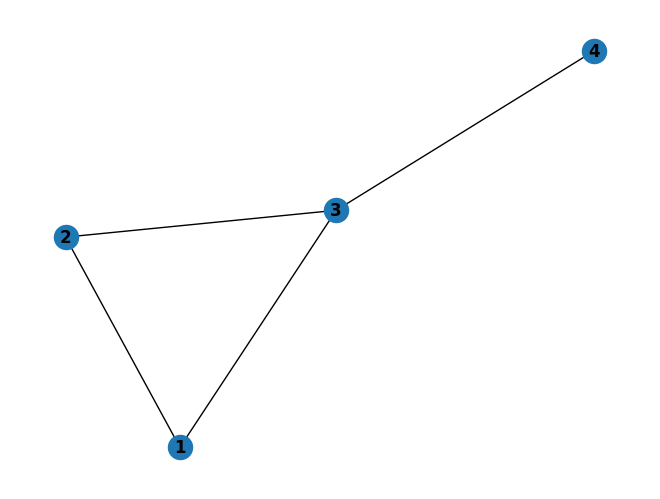

The graph is k-vertex connected with k=2: True


In [52]:
import matplotlib.pyplot as plt
from itertools import combinations

def is_k_vertex_connected(graph, k):
    # Funkcija za BFS pretragu grafa
    def bfs(graph, start, excluded_nodes):
        visited = set()
        queue = deque([start])

        while queue:
            node = queue.popleft()
            visited.add(node)

            for neighbor in graph[node]:
                if neighbor not in visited and neighbor not in excluded_nodes:
                    queue.append(neighbor)

        return visited

    # Provera da li je graf povezan nakon uklanjanja k čvorova
    def is_connected_after_removal(excluded_nodes):
        remaining_nodes = set(graph.keys()) - set(excluded_nodes)
        start_node = next(iter(remaining_nodes))
        visited_nodes = bfs(graph, start_node, excluded_nodes)
        return len(visited_nodes) == len(remaining_nodes)

    # Iteracija kroz sve kombinacije k čvorova
    all_nodes = list(graph.keys())
    for excluded_nodes in combinations(all_nodes, k):
        if is_connected_after_removal(excluded_nodes):
            return True

    return False

# Primer grafa kao rečnika
graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3]
}

# Crtanje grafa
nx.draw(nx.Graph(graph), with_labels=True, font_weight='bold')
plt.show()

# Postavljanje vrednosti za k
k_value = 2

# Provera da li je graf k-vertex povezan
result = is_k_vertex_connected(graph, k_value)

print(f"The graph is k-vertex connected with k={k_value}: {result}")
